# Homework-1

1) There are many weather related features. The collected weather data for Szeged is available in Kaggle under the heading "Weather in Szeged 2006-2016". The data file here is saved in the "data" folder. Using these data, create an artificial neural network model that predicts the air temperature, train the model and test it. Make estimates for some values.

## Explanation

### 1) The following columns from the data table will be completely omitted:

#### - Formatted Date
#### - Summary
#### - Apparent Temperature
#### - Loud Cover
#### - Daily Summary

In [1]:
import pandas as pd
# importing one hot encoder from sklearn 
from sklearn.preprocessing import OneHotEncoder,StandardScaler,LabelEncoder
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical

In [2]:
weatherHistory = pd.read_csv('data/weatherHistory.csv')
# weatherHistory = weatherHistory.dropna(subset=["Precip Type"])
weatherHistory = weatherHistory.dropna(subset=["Precip Type"])
weatherHistory

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251,15.8263,0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259,15.8263,0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204,14.9569,0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269,15.8263,0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259,15.8263,0,1016.51,Partly cloudy throughout the day.
...,...,...,...,...,...,...,...,...,...,...,...,...
96448,2016-09-09 19:00:00.000 +0200,Partly Cloudy,rain,26.016667,26.016667,0.43,10.9963,31,16.1000,0,1014.36,Partly cloudy starting in the morning.
96449,2016-09-09 20:00:00.000 +0200,Partly Cloudy,rain,24.583333,24.583333,0.48,10.0947,20,15.5526,0,1015.16,Partly cloudy starting in the morning.
96450,2016-09-09 21:00:00.000 +0200,Partly Cloudy,rain,22.038889,22.038889,0.56,8.9838,30,16.1000,0,1015.66,Partly cloudy starting in the morning.
96451,2016-09-09 22:00:00.000 +0200,Partly Cloudy,rain,21.522222,21.522222,0.60,10.5294,20,16.1000,0,1015.95,Partly cloudy starting in the morning.


In [3]:
weatherHistory = weatherHistory.drop(['Formatted Date',
                                      'Summary',
                                      'Apparent Temperature (C)',
                                      'Loud Cover',
                                      'Daily Summary'],1)
weatherHistory

,Precip Type,Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars)
0,rain,9.472222,0.89,14.1197,251,15.8263,1015.13
1,rain,9.355556,0.86,14.2646,259,15.8263,1015.63
2,rain,9.377778,0.89,3.9284,204,14.9569,1015.94
3,rain,8.288889,0.83,14.1036,269,15.8263,1016.41
4,rain,8.755556,0.83,11.0446,259,15.8263,1016.51
...,...,...,...,...,...,...,...
96448,rain,26.016667,0.43,10.9963,31,16.1000,1014.36
96449,rain,24.583333,0.48,10.0947,20,15.5526,1015.16
96450,rain,22.038889,0.56,8.9838,30,16.1000,1015.66
96451,rain,21.522222,0.60,10.5294,20,16.1000,1015.95


### 2) One hot encoding columns are:

### - Precip Type

In [4]:
set(list(weatherHistory['Precip Type']))

{'rain', 'snow'}

In [5]:
# creating instance of one-hot-encoder
one_hot_encoder = OneHotEncoder(handle_unknown='ignore')

#weatherHistory['Precip Type'] = one_hot_encoder.fit_transform(weatherHistory[['Precip Type']]).toarray()
#weatherHistory
precip_type = pd.DataFrame(one_hot_encoder.fit_transform(weatherHistory[['Precip Type']]).toarray())

#weatherHistory.pop('Precip Type')
weatherHistory_new = weatherHistory.join(precip_type)
weatherHistory_new.isnull().sum()

Precip Type                 0
Temperature (C)             0
Humidity                    0
Wind Speed (km/h)           0
Wind Bearing (degrees)      0
Visibility (km)             0
Pressure (millibars)        0
0                         517
1                         517
dtype: int64

In [6]:
df2 = pd.get_dummies(weatherHistory_new[["Precip Type"]])
weatherHistory_new = pd.concat([weatherHistory_new,df2],axis=1)
weatherHistory_new.pop('Precip Type')
weatherHistory_new

,Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),0,1,Precip Type_rain,Precip Type_snow
0,9.472222,0.89,14.1197,251,15.8263,1015.13,1.0,0.0,1,0
1,9.355556,0.86,14.2646,259,15.8263,1015.63,1.0,0.0,1,0
2,9.377778,0.89,3.9284,204,14.9569,1015.94,1.0,0.0,1,0
3,8.288889,0.83,14.1036,269,15.8263,1016.41,1.0,0.0,1,0
4,8.755556,0.83,11.0446,259,15.8263,1016.51,1.0,0.0,1,0
...,...,...,...,...,...,...,...,...,...,...
96448,26.016667,0.43,10.9963,31,16.1000,1014.36,NaN,NaN,1,0
96449,24.583333,0.48,10.0947,20,15.5526,1015.16,NaN,NaN,1,0
96450,22.038889,0.56,8.9838,30,16.1000,1015.66,NaN,NaN,1,0
96451,21.522222,0.60,10.5294,20,16.1000,1015.95,NaN,NaN,1,0


### 3) A feature scaling should be done in "standard scaling" format for all columns.



In [7]:
y = to_categorical(weatherHistory_new["Precip Type_rain"]) #weatherHistory_new[:,-1:]

In [8]:
standardisation = StandardScaler() 
  
# Scaled feature 
weatherHistory_new = standardisation.fit_transform(weatherHistory_new) 
  
print ("\nAfter Standardisation : \n", weatherHistory_new) 


After Standardisation : 
 [[-0.25795124  0.79274784  0.47896434 ... -0.35549917  0.35453109
  -0.35453109]
 [-0.27014132  0.63947007  0.49990155 ... -0.35549917  0.35453109
  -0.35453109]
 [-0.2678194   0.79274784 -0.99361974 ... -0.35549917  0.35453109
  -0.35453109]
 ...
 [ 1.0550949  -0.89330762 -0.26314359 ...         nan  0.35453109
  -0.35453109]
 [ 1.00111025 -0.68893726 -0.03981331 ...         nan  0.35453109
  -0.35453109]
 [ 0.88791662 -0.63784467 -0.71213053 ...         nan  0.35453109
  -0.35453109]]


4) 20% of the data set will be used as the test data set and 20% of the training data set will be used as a validation data set.



In [9]:
len(weatherHistory_new)

95936

In [10]:
int(len(weatherHistory_new)*0.20)

19187

In [11]:
X = weatherHistory_new[:,0:6]
X,y

(array([[-0.25795124,  0.79274784,  0.47896434,  0.59115659,  1.30910749,
          0.10215155],
        [-0.27014132,  0.63947007,  0.49990155,  0.66565503,  1.30910749,
          0.10641498],
        [-0.2678194 ,  0.79274784, -0.99361974,  0.15347822,  1.10080599,
          0.10905831],
        ...,
        [ 1.0550949 , -0.89330762, -0.26314359, -1.46686296,  1.37468389,
          0.10667079],
        [ 1.00111025, -0.68893726, -0.03981331, -1.55998601,  1.37468389,
          0.10914358],
        [ 0.88791662, -0.63784467, -0.71213053, -1.38305221,  1.23581623,
          0.11093422]]),
 array([[0., 1.],
        [0., 1.],
        [0., 1.],
        ...,
        [0., 1.],
        [0., 1.],
        [0., 1.]], dtype=float32))

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42, shuffle=True)
print("X_train", len(X_train))
print("X_test", len(X_test))
print("y_train", len(y_train))
print("y_test", len(y_test))

X_train 76748
X_test 19188
y_train 76748
y_test 19188


5) Use two hidden layers with 200 neurons in the model. Choose "stochastic_graident_descend" as optimizer algorithm. Use "mean_squared_error" for the loss function and "mean_absolute_error" for the metric value.


In [13]:
#get number of columns in training data
n_cols = X_train.shape[1]

model = Sequential()
model.add(Dense(200, activation='relu', input_shape=(n_cols,)))
model.add(Dense(200, kernel_initializer='normal', activation='relu'))
model.add(Dense(2, kernel_initializer='normal', activation='softmax'))

# Compile model
model.compile(loss='mean_squared_error', optimizer='sgd', metrics=['mean_absolute_error'])  # for binary classification


6) Determine the epoch value as 100 in training and create the loss and metric graphs against epoch. Try to determine the appropriate epoch value from graph.


In [14]:
history = model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=1, validation_split=0.2)

Epoch 1/100
1919/1919 [==============================] - 5s 3ms/step - loss: 0.0951 - mean_absolute_error: 0.2351 - val_loss: 0.0690 - val_mean_absolute_error: 0.1839
Epoch 2/100
1919/1919 [==============================] - 5s 3ms/step - loss: 0.0525 - mean_absolute_error: 0.1510 - val_loss: 0.0400 - val_mean_absolute_error: 0.1230
Epoch 3/100
1919/1919 [==============================] - 4s 2ms/step - loss: 0.0335 - mean_absolute_error: 0.1043 - val_loss: 0.0287 - val_mean_absolute_error: 0.0903
Epoch 4/100
1919/1919 [==============================] - 5s 3ms/step - loss: 0.0254 - mean_absolute_error: 0.0798 - val_loss: 0.0229 - val_mean_absolute_error: 0.0730
Epoch 5/100
1919/1919 [==============================] - 5s 3ms/step - loss: 0.0206 - mean_absolute_error: 0.0658 - val_loss: 0.0189 - val_mean_absolute_error: 0.0612
Epoch 6/100
1919/1919 [==============================] - 5s 2ms/step - loss: 0.0174 - mean_absolute_error: 0.0563 - val_loss: 0.0161 - val_mean_absolute_error: 0.052

1919/1919 [==============================] - 1s 555us/step - loss: 0.0050 - mean_absolute_error: 0.0143 - val_loss: 0.0054 - val_mean_absolute_error: 0.0147
Epoch 50/100
1919/1919 [==============================] - 2s 1ms/step - loss: 0.0050 - mean_absolute_error: 0.0141 - val_loss: 0.0054 - val_mean_absolute_error: 0.0146
Epoch 51/100
1919/1919 [==============================] - 1s 559us/step - loss: 0.0050 - mean_absolute_error: 0.0140 - val_loss: 0.0052 - val_mean_absolute_error: 0.0144
Epoch 52/100
1919/1919 [==============================] - 1s 539us/step - loss: 0.0049 - mean_absolute_error: 0.0139 - val_loss: 0.0053 - val_mean_absolute_error: 0.0143
Epoch 53/100
1919/1919 [==============================] - 1s 527us/step - loss: 0.0049 - mean_absolute_error: 0.0138 - val_loss: 0.0051 - val_mean_absolute_error: 0.0140
Epoch 54/100
1919/1919 [==============================] - 1s 573us/step - loss: 0.0048 - mean_absolute_error: 0.0136 - val_loss: 0.0053 - val_mean_absolute_error: 0.

1919/1919 [==============================] - 1s 558us/step - loss: 0.0041 - mean_absolute_error: 0.0108 - val_loss: 0.0044 - val_mean_absolute_error: 0.0114
Epoch 98/100
1919/1919 [==============================] - 1s 565us/step - loss: 0.0041 - mean_absolute_error: 0.0108 - val_loss: 0.0043 - val_mean_absolute_error: 0.0112
Epoch 99/100
1919/1919 [==============================] - 1s 565us/step - loss: 0.0041 - mean_absolute_error: 0.0107 - val_loss: 0.0044 - val_mean_absolute_error: 0.0114
Epoch 100/100
1919/1919 [==============================] - 1s 610us/step - loss: 0.0040 - mean_absolute_error: 0.0107 - val_loss: 0.0043 - val_mean_absolute_error: 0.0112



7) To improve the model, add layers to the model and observe the behavior of the model. Experiment by changing the number of neurons in the layers.

In [15]:
loss_and_metrics = model.evaluate(X_test, y_test, batch_size=128)
loss_and_metrics

150/150 [==============================] - 0s 472us/step - loss: 0.0037 - mean_absolute_error: 0.0101


In [24]:
classes = model.predict(X_test, batch_size=128)
classes

array([0, 1, 1, ..., 1, 1, 1])

In [17]:
(model.predict(X_test)>0.5).astype(int).ravel()

array([1, 0, 0, ..., 1, 0, 1])

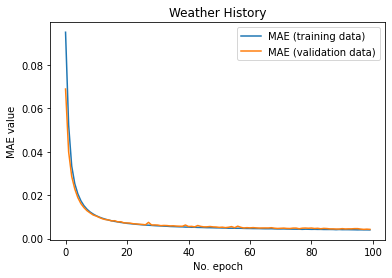

In [20]:
%matplotlib inline
import matplotlib.pyplot as plt
# Plot history: MAE
plt.plot(history.history['loss'], label='MAE (training data)')
plt.plot(history.history['val_loss'], label='MAE (validation data)')
plt.title('Weather History')
plt.ylabel('MAE value')
plt.xlabel('No. epoch')
plt.legend(loc="upper right")
plt.show()